In [1]:
# Import libraries
import pandas as pd
import geopandas as gpd
# Operations on geometries
import shapely
import numpy as np
import math
import glob 
import xarray as xr
import xarray
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import tensorflow as tf
import statsmodels.api as sm
import xgboost
import xgboost as xgb
import csv as csv
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn import linear_model
from sklearn.model_selection import cross_val_score,KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.model_selection import TimeSeriesSplit,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor  #Perforing grid search
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
import scipy
from scipy import stats
import os

import matplotlib.pyplot as plt

from scipy.stats import skew
from collections import OrderedDict


import math
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout, BatchNormalization
from keras.callbacks import EarlyStopping

from utils_functions.utils_data import *
from utils_functions.utils_ml import *
from utils_functions.utils_RF import *
from utils_functions.utils_plot import *
from utils_functions.utils_LSTM import *

/Users/noeliaotero/opt/anaconda3/envs/py39/lib/python3.9/site-packages/seaborn/apionly.py:9: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


In [2]:
%matplotlib inline

In [3]:
PATH_dis = '/Users/noeliaotero/Documents/OCCR/data/Output_data/csv/Observed_discharge_entsoe_powerplants/'

In [4]:
PATH_data_out = '/Users/noeliaotero/Documents/OCCR/data/Output_data/csv/outmodels/LSTM/'
os.makedirs(PATH_data_out, exist_ok=True)

In [5]:
# Where to save the figures
PROJECT_ROOT_DIR = '/Users/noeliaotero/Documents/OCCR/Results/Hydro_project/Analaysis_Feb22/LSTM/'
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)


In [6]:
# save results
PATH_OUT = '/Users/noeliaotero/Documents/OCCR/Results/Hydro_project/'

In [7]:
list_input = readfiles(PATH_dis + 'mergedata_with_index')

In [8]:
list_input[0].columns

Index(['date', 'eic_g', 'name_p', 'ID6', 'ID', 'EZG_km2', 'lon', 'lat',
       'eic_p', 'type_g', 'discharge', 'discharge_mmd', 'hp',
       'PowerSystemResourceName', 'name_g', 'ActualGenerationOutput',
       'InstalledGenCapacity', 'capacity_p', 'generation', 't2m', 't2mmax',
       'prec', 'prec7D', 'prec15D', 'prec30D', 't2max7D', 't2max15D',
       't2max30D', 't2m7D', 't2m15D', 't2m30D', 'dis7D', 'dis15D', 'dis30D',
       'month', 'season', 'spei_1', 'spei_3', 'spei_6', 'spei_12', 'STI_1',
       'STI_2', 'STI_3'],
      dtype='object')

In [9]:
YY_TRAIN = [2016, 2020]
YY_TEST = [2021,2021]
YY_RECONSTRUCTION = [1979, 2015]

In [10]:
YY_OFIBLE_RECONSTRUCTION = [1987, 2015]
YY_Emos_RECONSTRUCTION = [1991, 2015]

In [11]:
# split in train and test
# data preparation
colnames = ['date','t2m', 'prec', 'prec7D', 'prec15D', 'prec30D', 't2m7D', 't2m15D','t2m30D','discharge','dis7D', 'dis15D', 'dis30D']
Features = ['t2m', 'prec', 'prec7D', 'prec15D', 'prec30D', 't2m7D', 't2m15D','t2m30D','discharge','dis7D', 'dis15D', 'dis30D']
# stations with generation only from 2018
label = 'generation'

In [12]:
# Run models over all power stations
len(list_input)

6

In [13]:
# Define inputs
EPOCHS = 50
loss_f = 'mean_squared_error'
opt = 'adam'
plot = True
BS = 64 # batch size


In [14]:
# Predict the amount of precipitation
df_out = pd.DataFrame(columns = ['station', 'model', 'train_rmse', 'test_rmse','train_mae', 'test_mae', 'cor_train','cor_test'])

preparing data for 0
LSTM_v1


2022-04-07 20:19:42.048527: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


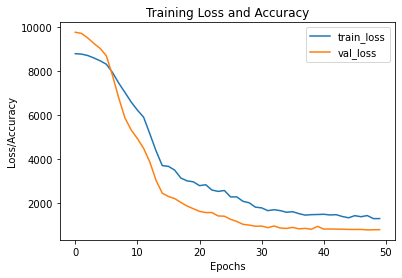

 RMSE: 24.629815
 RMSE: 27.797093


/Users/noeliaotero/Documents/OCCR/scripts/jupyter.notes/Hydropower/utils_functions/utils_plot.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n['pred'] = pred_recons.flatten()


Saving figure AET Leventina_LSTM_v1_reconstruction
Saving figure AET Leventina_LSTM_v1_reconstruction
Saving figure AET Leventina_LSTM_v1test
Saving figure AET Leventina_LSTM_v1train
 Computing LSTM feature importance...


100%|██████████| 12/12 [00:01<00:00, 10.39it/s]



Saving figure AET Leventina_LSTM_v1Feature_IMPORT_test
ann1


/Users/noeliaotero/opt/anaconda3/envs/py39/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


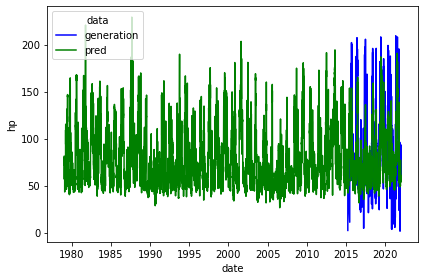

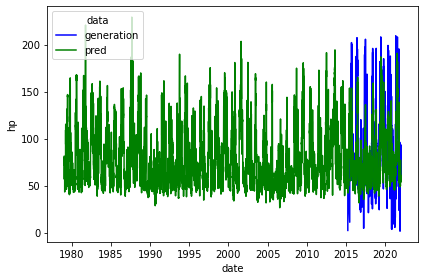

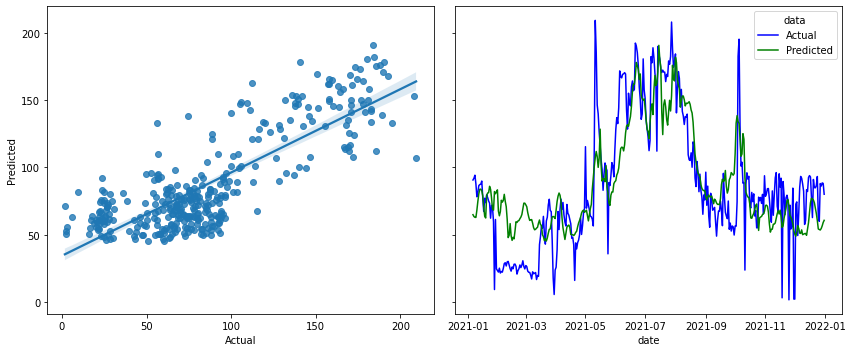

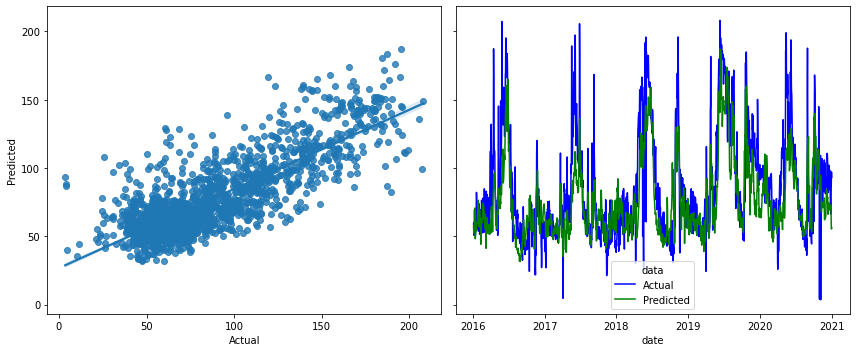

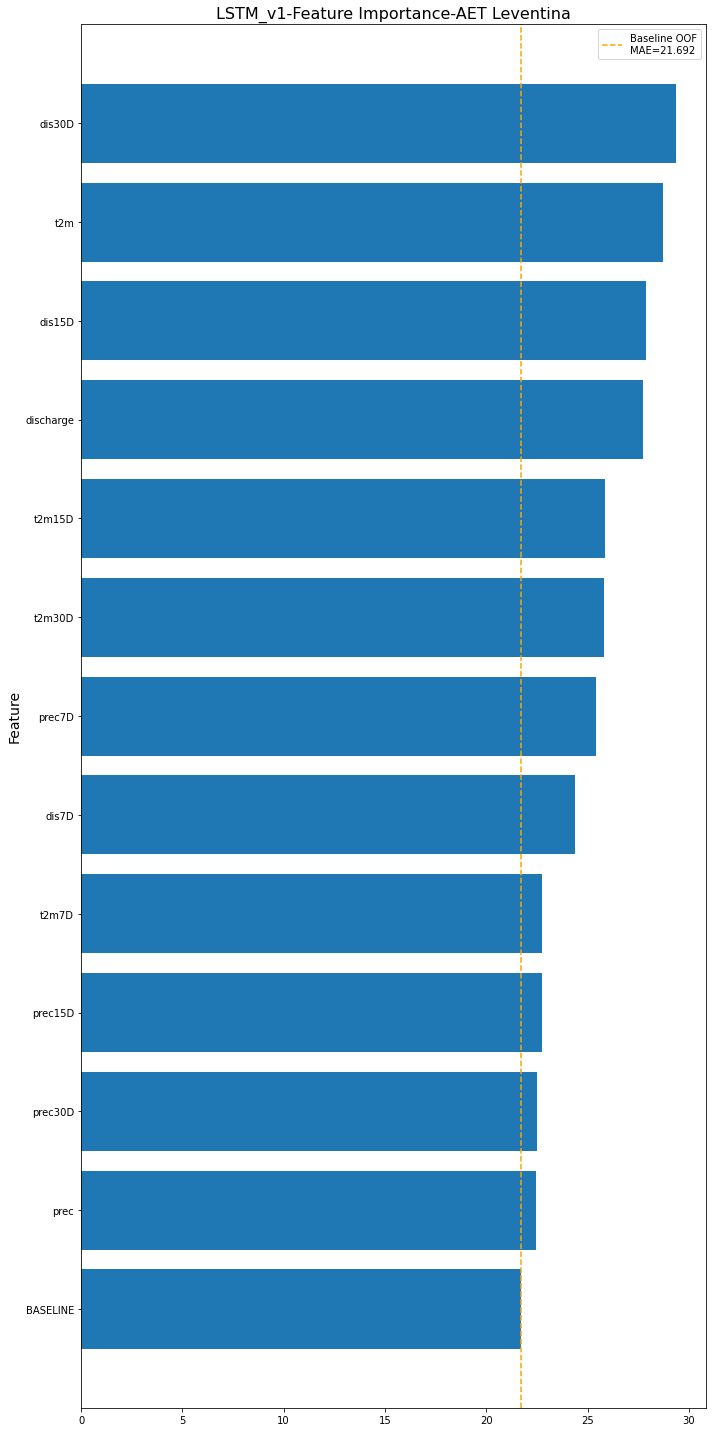

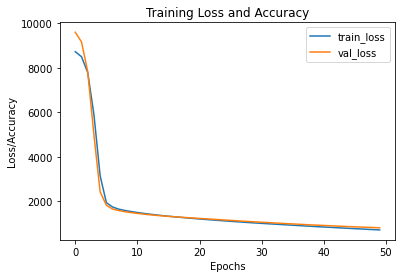

 RMSE: 26.279808
 RMSE: 28.561394


/Users/noeliaotero/Documents/OCCR/scripts/jupyter.notes/Hydropower/utils_functions/utils_plot.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n['pred'] = pred_recons.flatten()


Saving figure AET Leventina_ann1_reconstruction
Saving figure AET Leventina_ann1_reconstruction
Saving figure AET Leventina_ann1test
Saving figure AET Leventina_ann1train
preparing data for 1
LSTM_v1


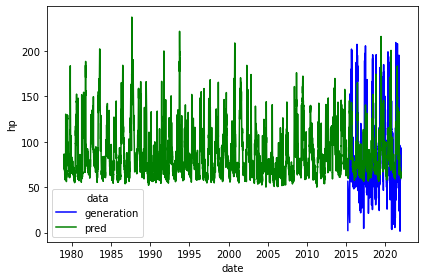

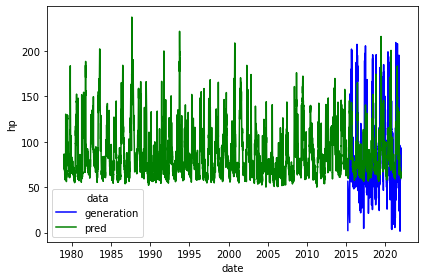

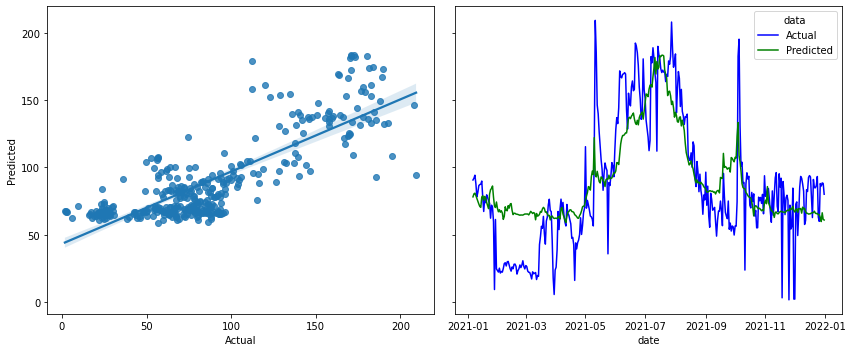

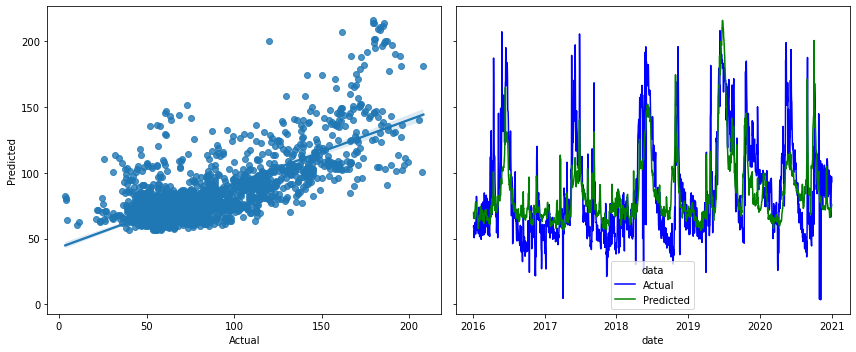

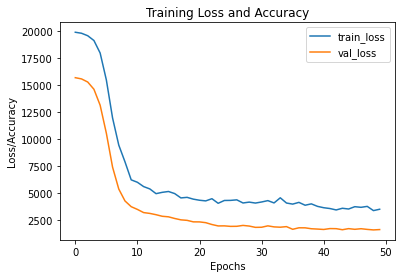

 RMSE: 44.396299
 RMSE: 40.251338


/Users/noeliaotero/Documents/OCCR/scripts/jupyter.notes/Hydropower/utils_functions/utils_plot.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n['pred'] = pred_recons.flatten()


Saving figure Electra-Massa (EM)_LSTM_v1_reconstruction
Saving figure Electra-Massa (EM)_LSTM_v1_reconstruction
Saving figure Electra-Massa (EM)_LSTM_v1test
Saving figure Electra-Massa (EM)_LSTM_v1train
 Computing LSTM feature importance...


100%|██████████| 12/12 [00:00<00:00, 27.21it/s]
/Users/noeliaotero/opt/anaconda3/envs/py39/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(



Saving figure Electra-Massa (EM)_LSTM_v1Feature_IMPORT_test
ann1


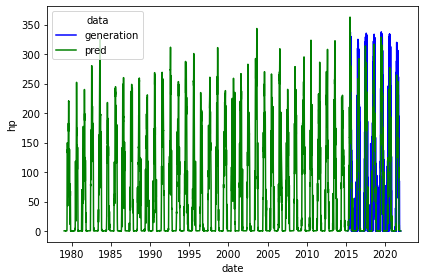

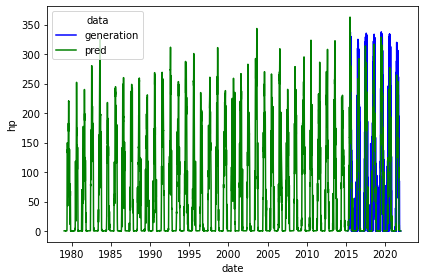

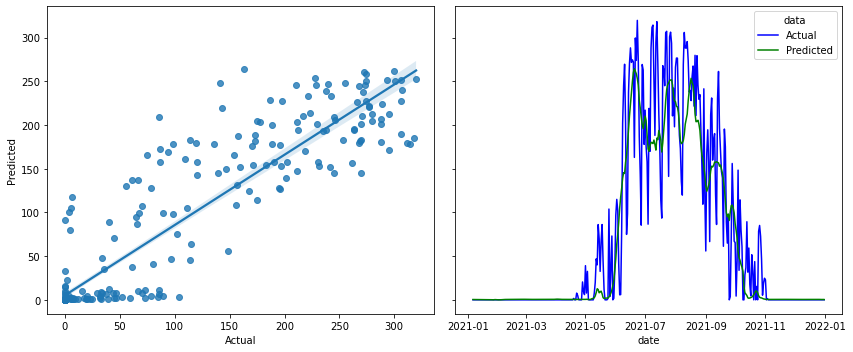

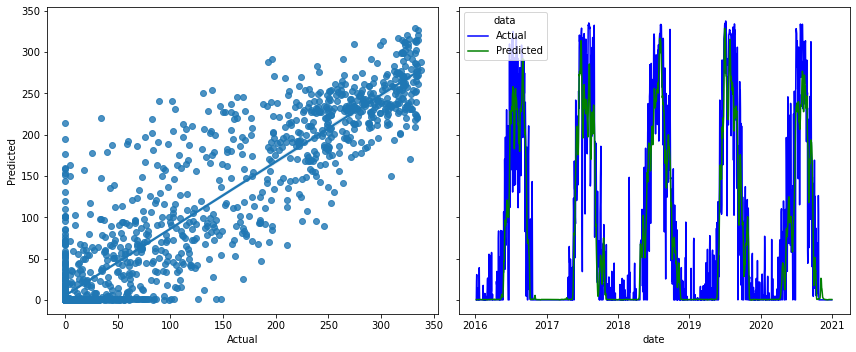

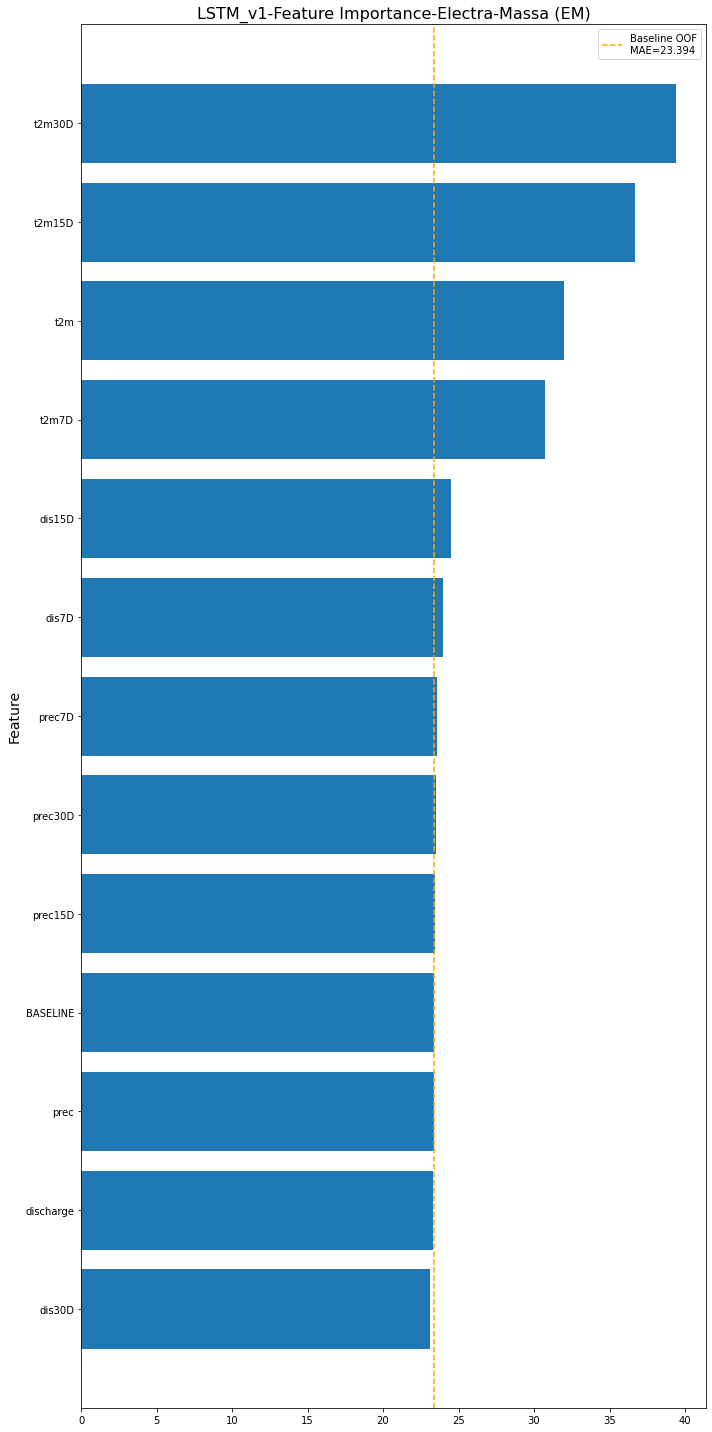

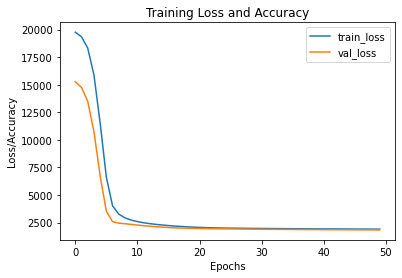

 RMSE: 43.402411
 RMSE: 42.775954


/Users/noeliaotero/Documents/OCCR/scripts/jupyter.notes/Hydropower/utils_functions/utils_plot.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n['pred'] = pred_recons.flatten()


Saving figure Electra-Massa (EM)_ann1_reconstruction
Saving figure Electra-Massa (EM)_ann1_reconstruction
Saving figure Electra-Massa (EM)_ann1test
Saving figure Electra-Massa (EM)_ann1train
preparing data for 2
selecting different reconstruction dates
LSTM_v1


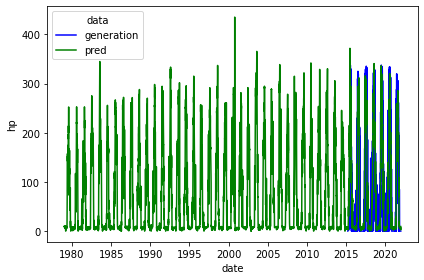

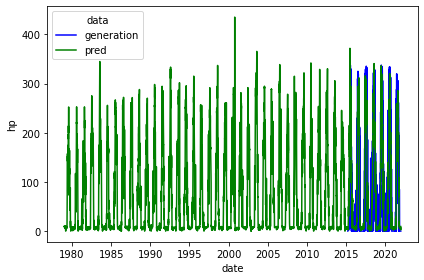

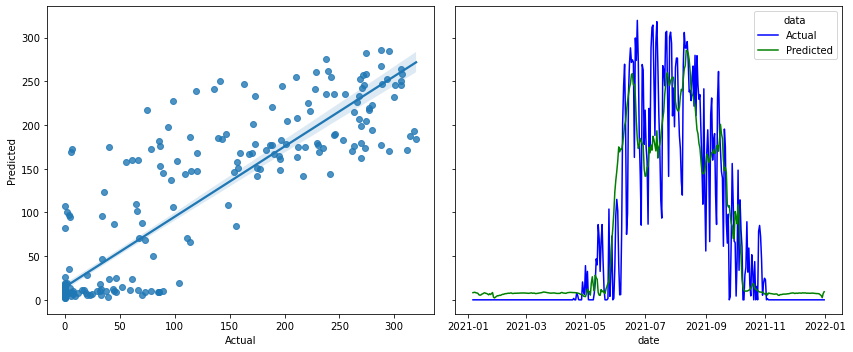

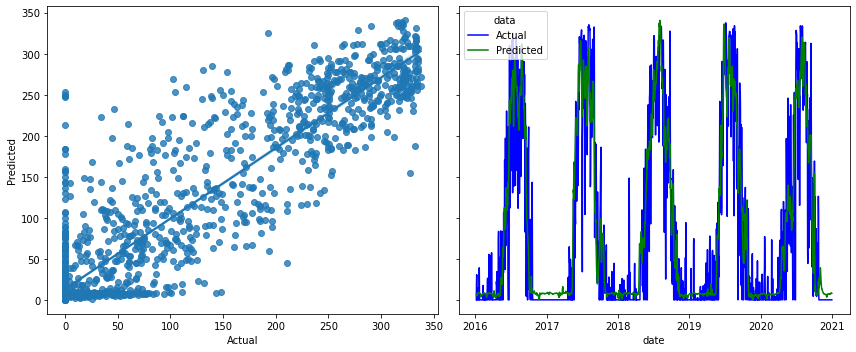

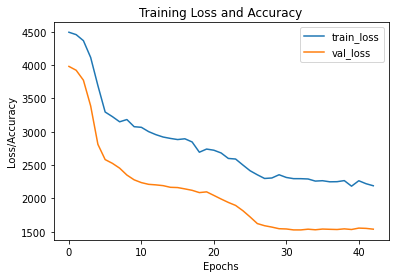

 RMSE: 43.839094
 RMSE: 39.221157


/Users/noeliaotero/Documents/OCCR/scripts/jupyter.notes/Hydropower/utils_functions/utils_plot.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n['pred'] = pred_recons.flatten()


Saving figure Emosson (ESA)_LSTM_v1_reconstruction
Saving figure Emosson (ESA)_LSTM_v1_reconstruction
Saving figure Emosson (ESA)_LSTM_v1test
Saving figure Emosson (ESA)_LSTM_v1train
 Computing LSTM feature importance...


100%|██████████| 12/12 [00:00<00:00, 22.40it/s]



Saving figure Emosson (ESA)_LSTM_v1Feature_IMPORT_test
ann1


/Users/noeliaotero/opt/anaconda3/envs/py39/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


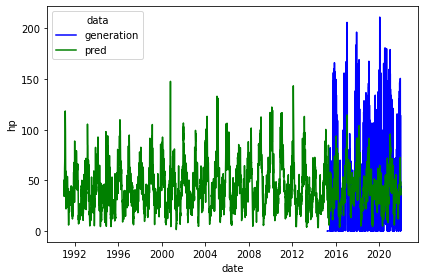

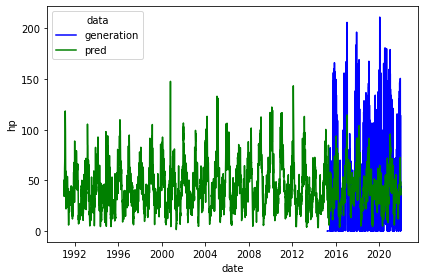

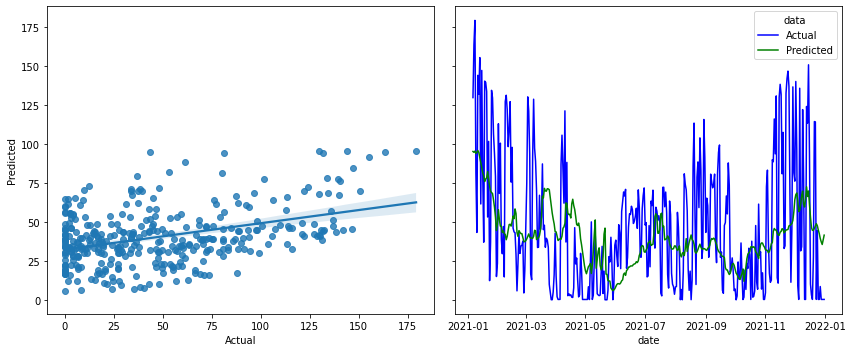

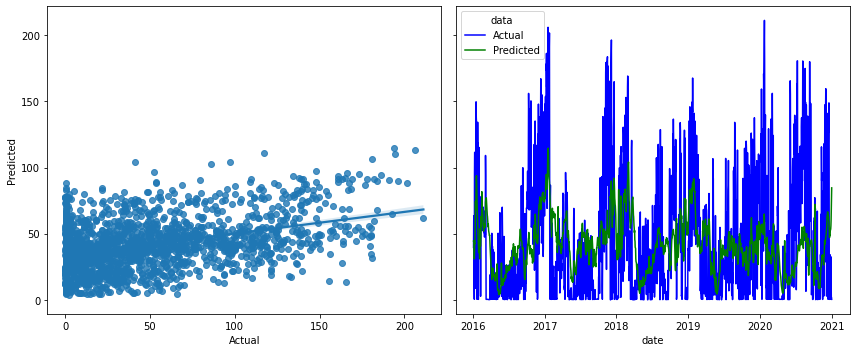

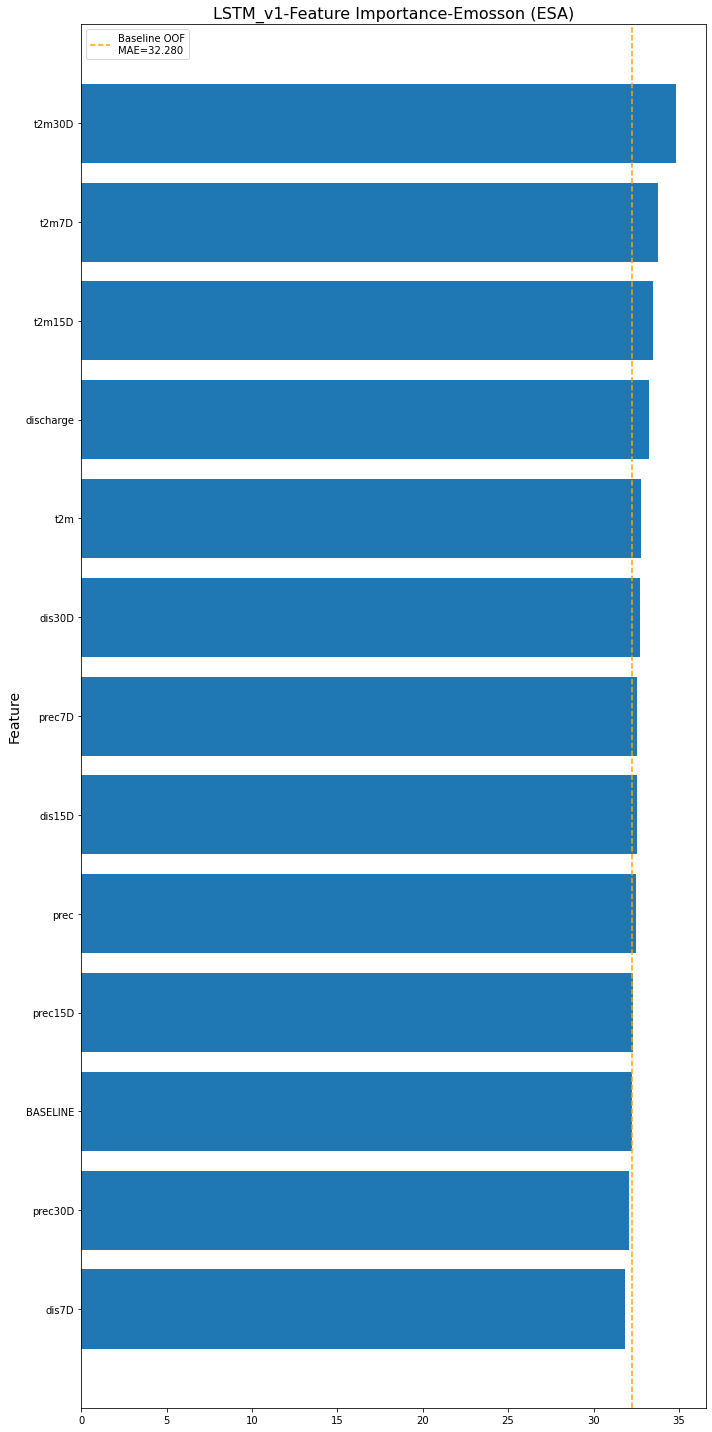

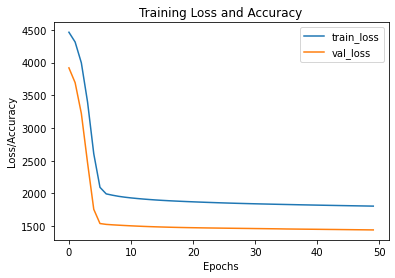

 RMSE: 42.269127
 RMSE: 37.995104


/Users/noeliaotero/Documents/OCCR/scripts/jupyter.notes/Hydropower/utils_functions/utils_plot.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n['pred'] = pred_recons.flatten()


Saving figure Emosson (ESA)_ann1_reconstruction
Saving figure Emosson (ESA)_ann1_reconstruction
Saving figure Emosson (ESA)_ann1test
Saving figure Emosson (ESA)_ann1train
preparing data for 3
LSTM_v1


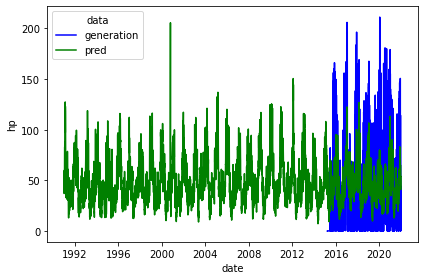

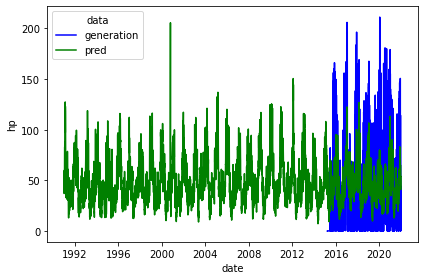

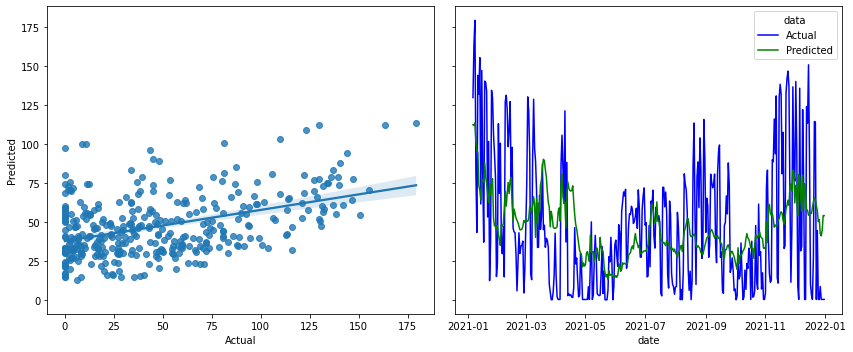

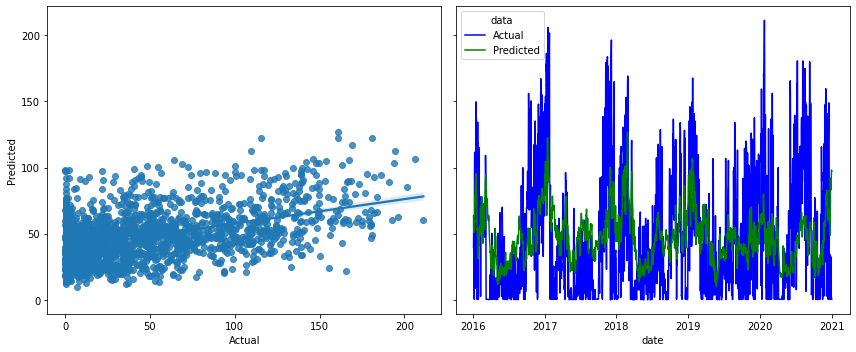

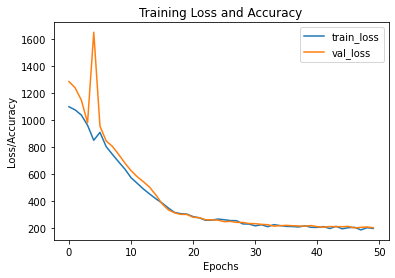

 RMSE: 10.030445
 RMSE: 14.320198


/Users/noeliaotero/Documents/OCCR/scripts/jupyter.notes/Hydropower/utils_functions/utils_plot.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n['pred'] = pred_recons.flatten()


Saving figure KW Rheinfelden CH_LSTM_v1_reconstruction
Saving figure KW Rheinfelden CH_LSTM_v1_reconstruction
Saving figure KW Rheinfelden CH_LSTM_v1test
Saving figure KW Rheinfelden CH_LSTM_v1train
 Computing LSTM feature importance...


100%|██████████| 12/12 [00:00<00:00, 25.42it/s]
/Users/noeliaotero/opt/anaconda3/envs/py39/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(



Saving figure KW Rheinfelden CH_LSTM_v1Feature_IMPORT_test
ann1


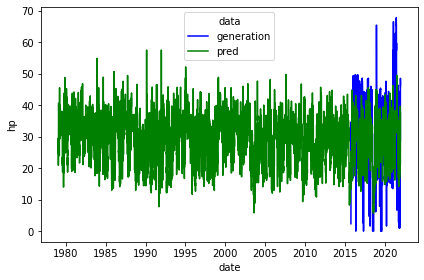

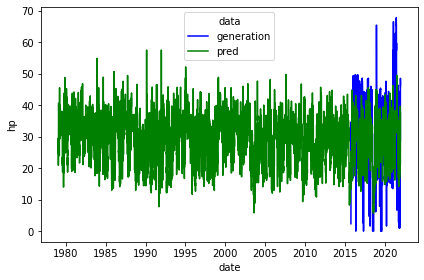

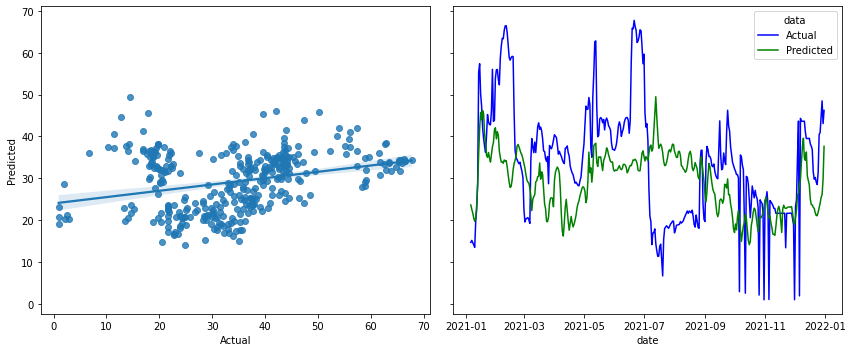

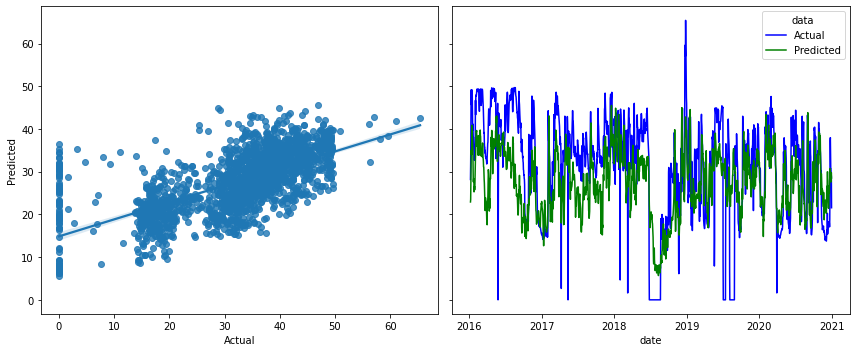

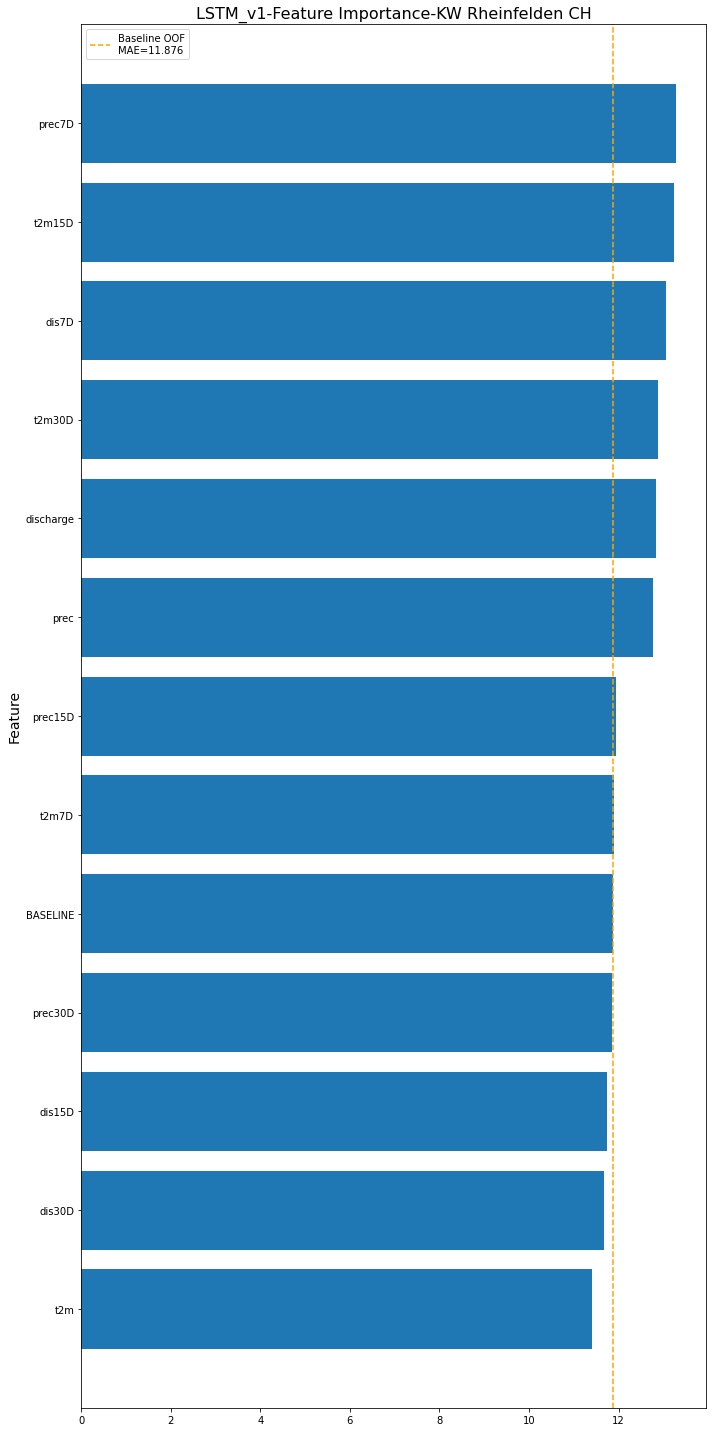

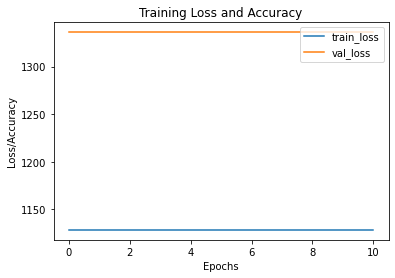

 RMSE: 33.593157
 RMSE: 36.551719


/Users/noeliaotero/Documents/OCCR/scripts/jupyter.notes/Hydropower/utils_functions/utils_plot.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n['pred'] = pred_recons.flatten()


Saving figure KW Rheinfelden CH_ann1_reconstruction
Saving figure KW Rheinfelden CH_ann1_reconstruction


/Users/noeliaotero/opt/anaconda3/envs/py39/lib/python3.9/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Saving figure KW Rheinfelden CH_ann1test
Saving figure KW Rheinfelden CH_ann1train
preparing data for 4
LSTM_v1


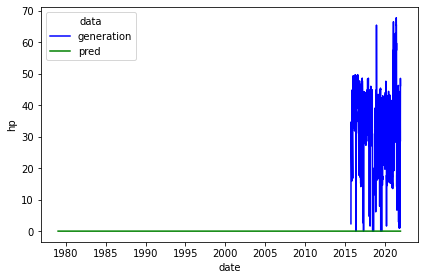

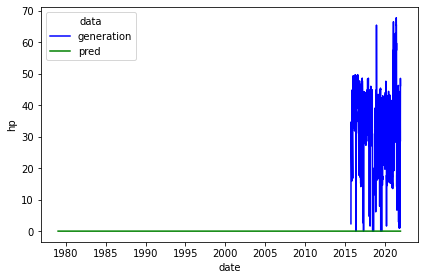

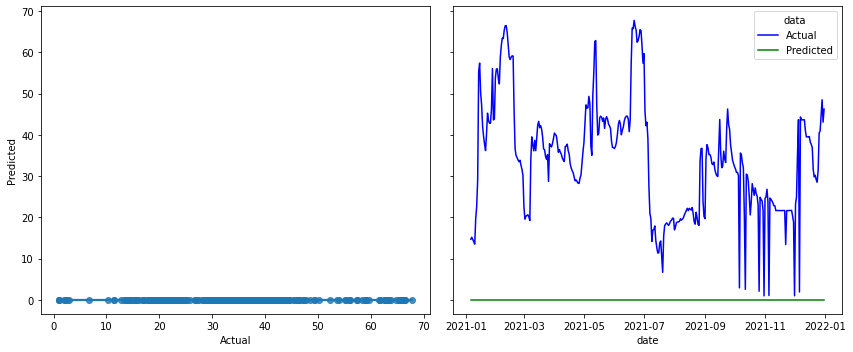

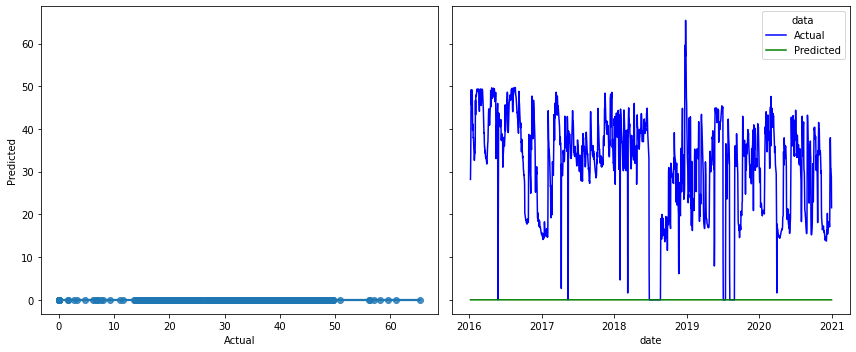

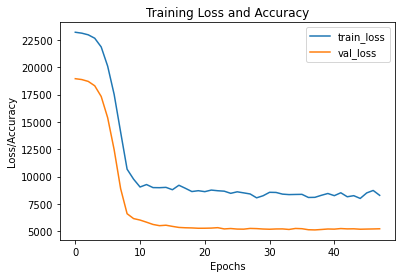

 RMSE: 79.449476
 RMSE: 72.365810


/Users/noeliaotero/Documents/OCCR/scripts/jupyter.notes/Hydropower/utils_functions/utils_plot.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n['pred'] = pred_recons.flatten()


Saving figure Kraftwerke Mauvoisin AG_LSTM_v1_reconstruction
Saving figure Kraftwerke Mauvoisin AG_LSTM_v1_reconstruction
Saving figure Kraftwerke Mauvoisin AG_LSTM_v1test
Saving figure Kraftwerke Mauvoisin AG_LSTM_v1train
 Computing LSTM feature importance...


100%|██████████| 12/12 [00:00<00:00, 25.55it/s]
/Users/noeliaotero/opt/anaconda3/envs/py39/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(



Saving figure Kraftwerke Mauvoisin AG_LSTM_v1Feature_IMPORT_test
ann1


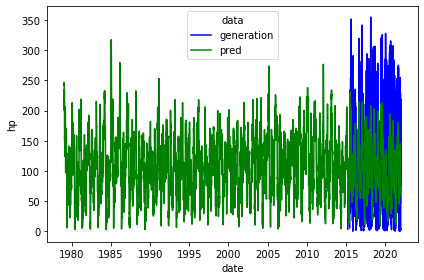

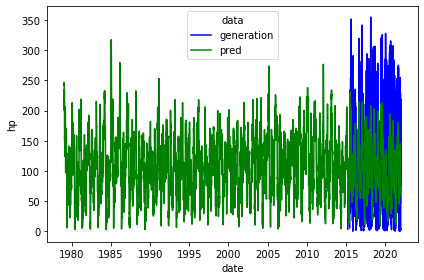

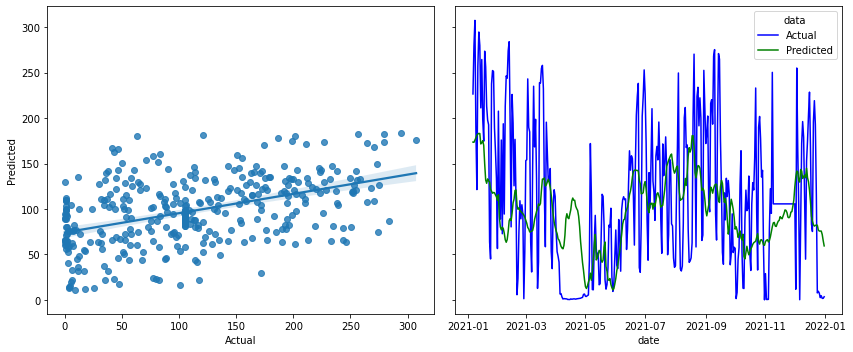

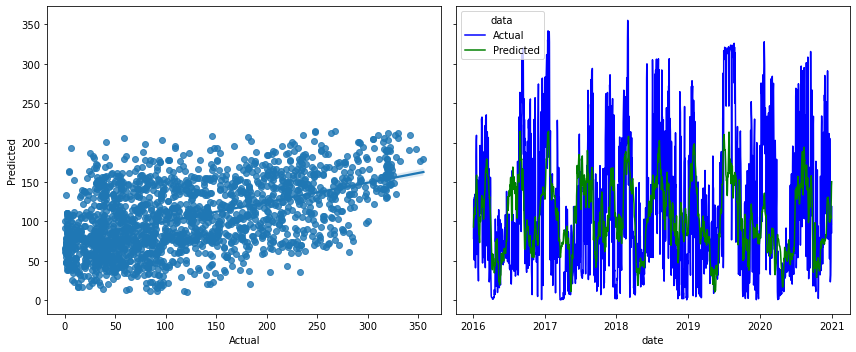

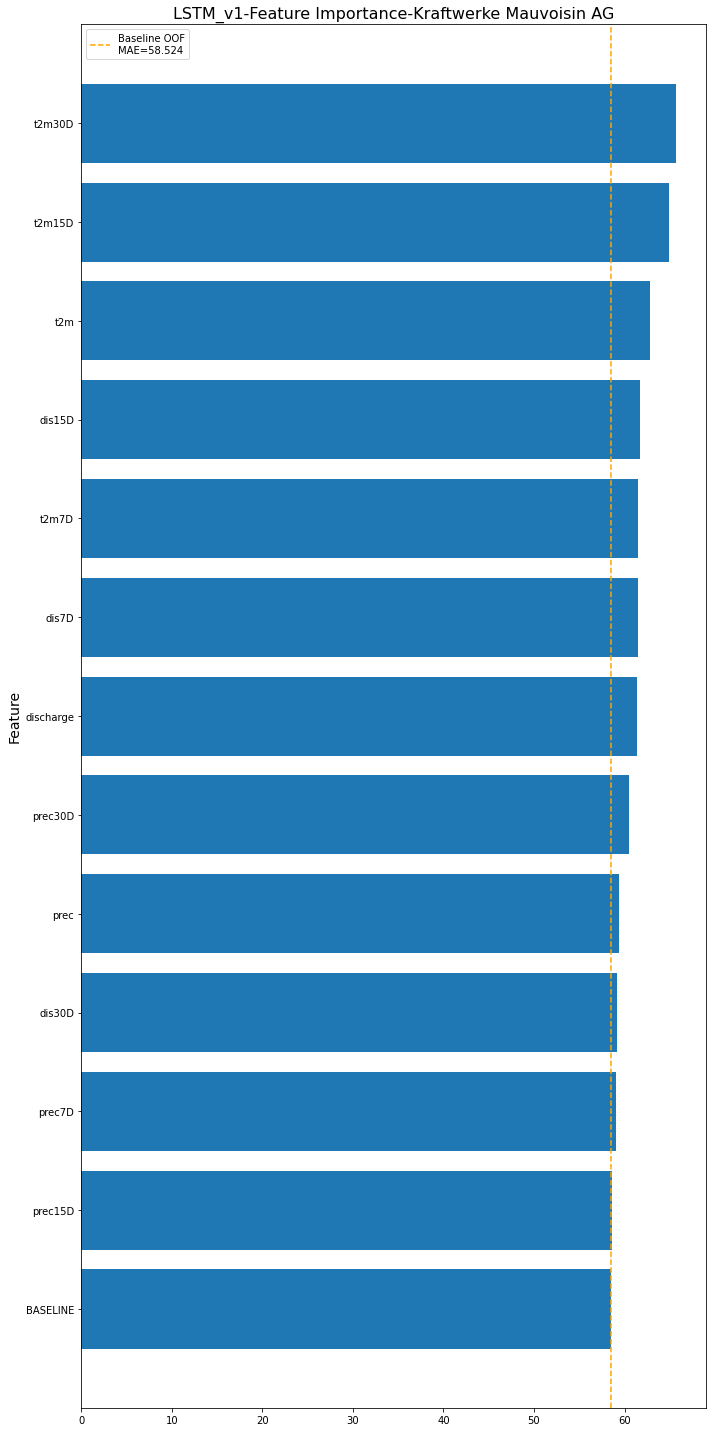

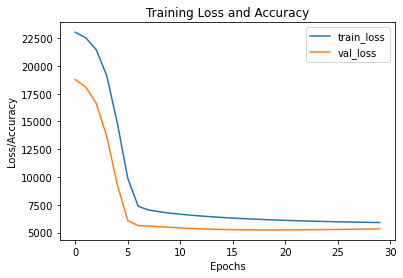

 RMSE: 76.314076
 RMSE: 73.060655


/Users/noeliaotero/Documents/OCCR/scripts/jupyter.notes/Hydropower/utils_functions/utils_plot.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n['pred'] = pred_recons.flatten()


Saving figure Kraftwerke Mauvoisin AG_ann1_reconstruction
Saving figure Kraftwerke Mauvoisin AG_ann1_reconstruction
Saving figure Kraftwerke Mauvoisin AG_ann1test
Saving figure Kraftwerke Mauvoisin AG_ann1train
preparing data for 5
selecting different reconstruction dates
LSTM_v1


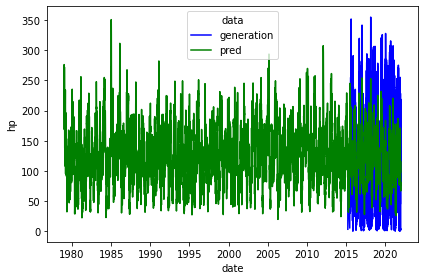

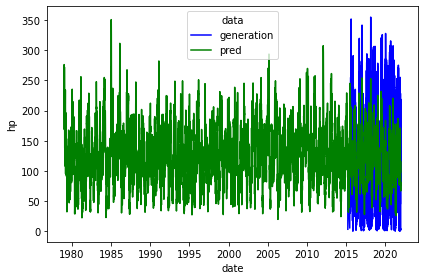

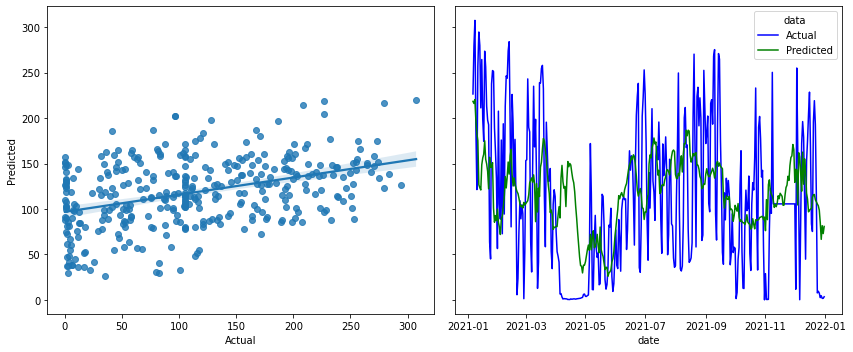

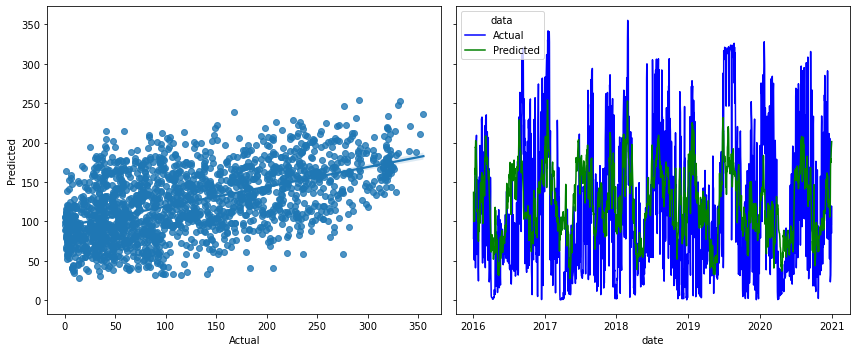

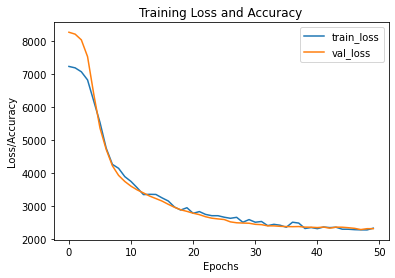

 RMSE: 41.445186
 RMSE: 48.075428


/Users/noeliaotero/Documents/OCCR/scripts/jupyter.notes/Hydropower/utils_functions/utils_plot.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n['pred'] = pred_recons.flatten()


Saving figure Blenio (OFIBLE)_LSTM_v1_reconstruction
Saving figure Blenio (OFIBLE)_LSTM_v1_reconstruction
Saving figure Blenio (OFIBLE)_LSTM_v1test
Saving figure Blenio (OFIBLE)_LSTM_v1train
 Computing LSTM feature importance...


100%|██████████| 12/12 [00:00<00:00, 24.37it/s]
/Users/noeliaotero/opt/anaconda3/envs/py39/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(



Saving figure Blenio (OFIBLE)_LSTM_v1Feature_IMPORT_test
ann1


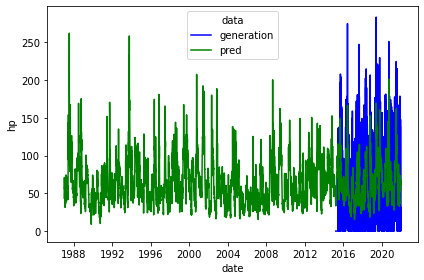

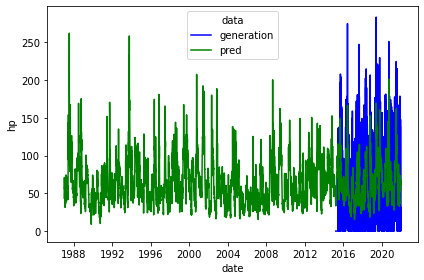

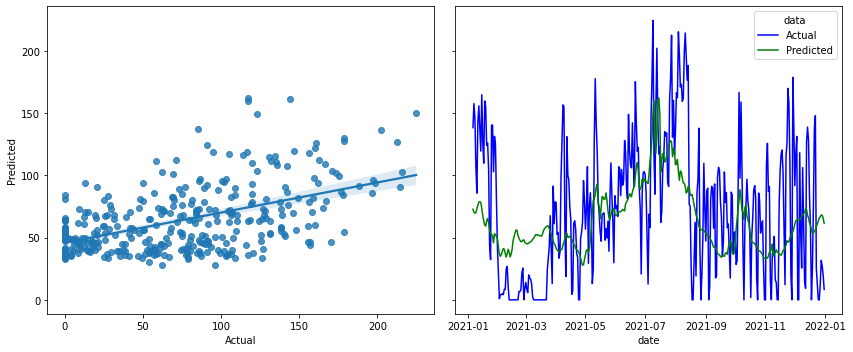

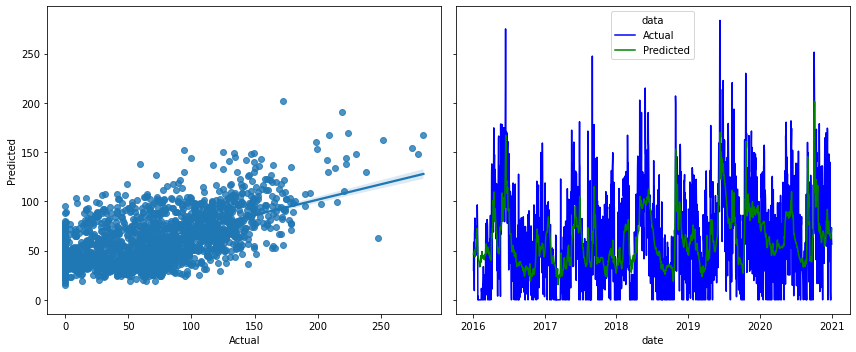

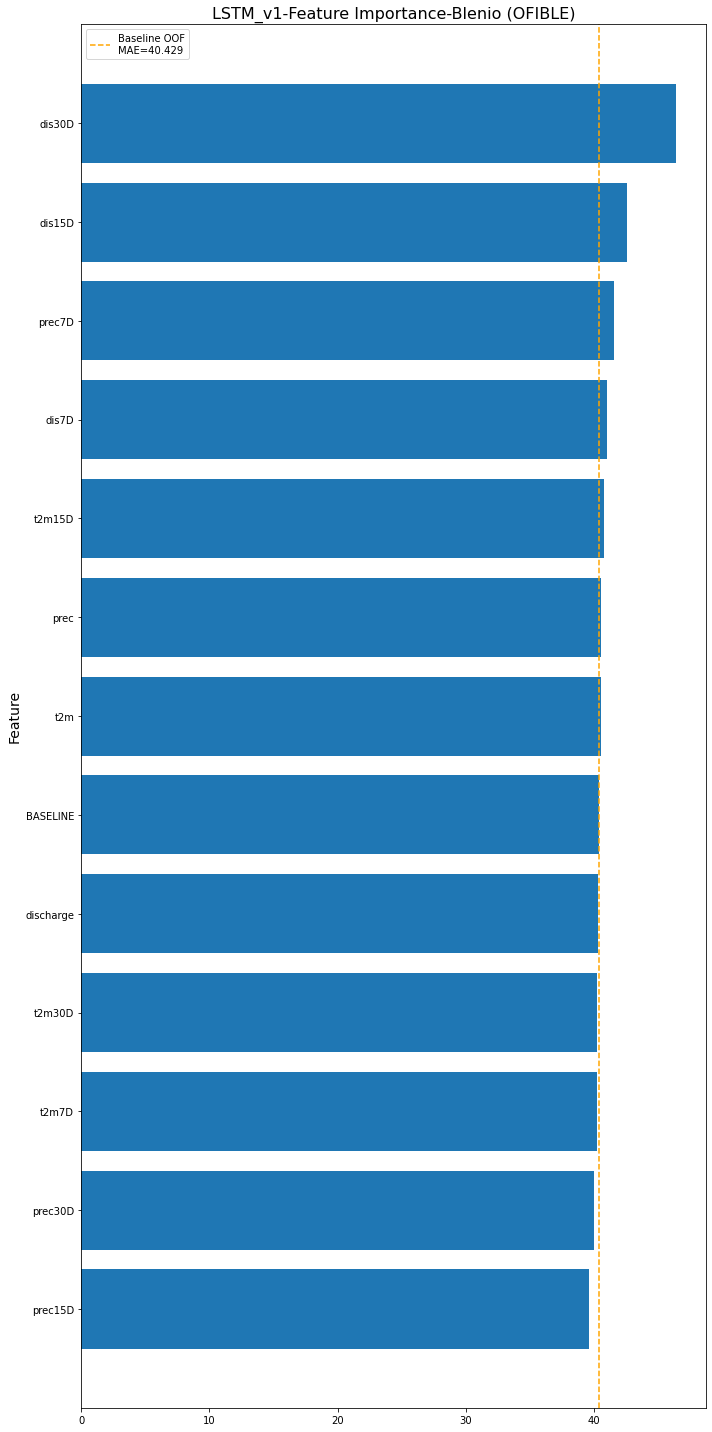

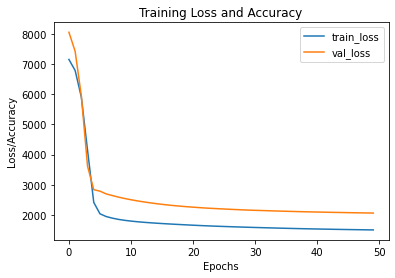

 RMSE: 38.607446
 RMSE: 45.456668


/Users/noeliaotero/Documents/OCCR/scripts/jupyter.notes/Hydropower/utils_functions/utils_plot.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n['pred'] = pred_recons.flatten()


Saving figure Blenio (OFIBLE)_ann1_reconstruction
Saving figure Blenio (OFIBLE)_ann1_reconstruction
Saving figure Blenio (OFIBLE)_ann1test
Saving figure Blenio (OFIBLE)_ann1train


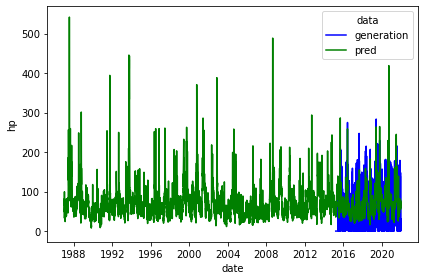

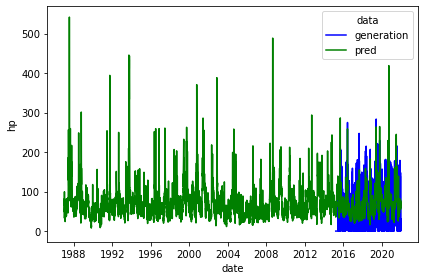

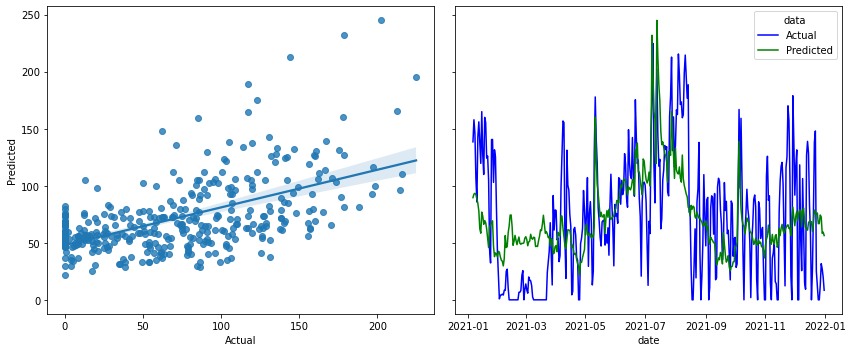

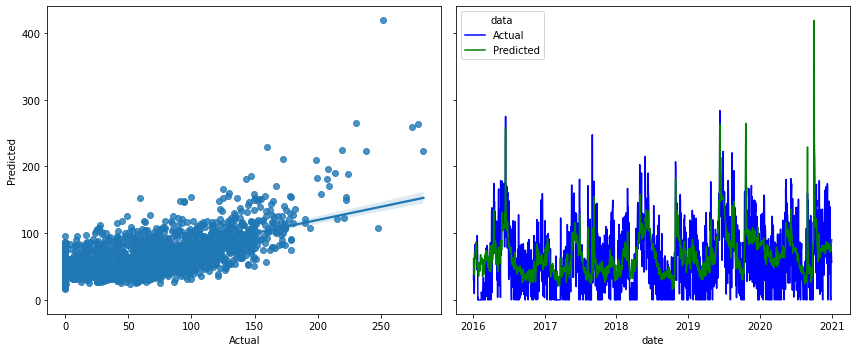

In [15]:
models = ['LSTM_v1','ann1']
l_hist = []
l_mod = []
all_models = []
all_hist = []
all_data = []
W = 5 # number of timesteps
#for station in range(0,2):
    
for station in range(0,len(list_input)):
    print('preparing data for', station)
    df = list_input[station]
    df["date"] = pd.to_datetime(df["date"])
    # to store the results
    name_s = df.name_p.unique()
    from numpy import nan
    name_s = [x for x in name_s if x is not nan]
    name_s = ''.join(name_s)
    
    if name_s == 'Emosson (ESA)':
        print('selecting different reconstruction dates')
        df_i = df[(df.date.dt.year >= YY_Emos_RECONSTRUCTION[0]) &  (df.date.dt.year <= YY_TEST[1])]
        dat_train, dat_test, dat_reconstruction, dates_train, dates_test, dates_recons = splitdata(df,YY_TRAIN, YY_TEST, YY_Emos_RECONSTRUCTION)
    elif name_s == 'Blenio (OFIBLE)':
        print('selecting different reconstruction dates')
        df_i = df[(df.date.dt.year >= YY_OFIBLE_RECONSTRUCTION[0]) &  (df.date.dt.year <= YY_TEST[1])]
        dat_train, dat_test, dat_reconstruction, dates_train, dates_test, dates_recons = splitdata(df,YY_TRAIN, YY_TEST, YY_OFIBLE_RECONSTRUCTION)
    else:  
        df_i = df[(df.date.dt.year >= YY_RECONSTRUCTION[0]) &  (df.date.dt.year <= YY_TEST[1])]
        dat_train, dat_test, dat_reconstruction, dates_train, dates_test, dates_recons = splitdata(df,YY_TRAIN, YY_TEST, YY_RECONSTRUCTION)
        
   
    
    l_recons = []
   
    for imod in range(0,len(models)):
        print(models[imod])
     
        if (models[imod] == 'ann1'):
            
            X_train_in, y_train, X_test_in, y_test, X_reconstruction_in, X_all_in = preparedata_tomodel(dat_train, dat_test, dat_reconstruction, df_i, colnames, label)
          
        else:
            X_train_in, y_train, X_test_in, y_test, X_reconstruction_in, X_all_in = preparedata_toLSTM(dat_train, dat_test, dat_reconstruction, df_i, Features, label, W)
    
    
        inputs = X_train_in.shape[1:]
        out_mod = HPmodels(inputs, models[imod])
        mod = out_mod.model
            # compile
        mod.compile(loss= loss_f, optimizer= opt)
        
        #BS = 2
        hist = mod.fit(X_train_in, y_train, epochs=EPOCHS, batch_size=BS, validation_data=(X_test_in, y_test), 
                        callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=0, shuffle=False)
        
        plot_hist(hist)
       
        pred_test = mod.predict(X_test_in)
        pred_train = mod.predict(X_train_in)
        rmse_train = evaluate_model(y_train, pred_train.flatten())
        rmse_test = evaluate_model(y_test, pred_test.flatten())
        mae_train = mean_absolute_error(y_train, pred_train.flatten())
        mae_test = mean_absolute_error(y_test, pred_test.flatten())
        
        
        fig_recons = name_s + '_' + models[imod] + '_reconstruction'
        
        if (models[imod] == 'ann1'):
            dat_recons = recons(mod, X_all_in, df_i)
        
        else:
            
            dat_recons = recons(mod,X_all_in, df_i[W:len(df_i)]) 
            
        
         
        # plot reconstructions
        plot_recons(dat_recons,fig_recons, IMAGES_PATH)
        
        dat_recons.columns = ['date','generation','pred_'+ models[imod]]
    
        dat_recons.columns = ['date','generation','pred_'+ models[imod]]
         # plot reconstructions
        plot_recons(dat_recons,fig_recons, IMAGES_PATH)
        
        
        
        df_out = df_out.append({'station': name_s}, ignore_index=True)
        df_out.at[df_out.index[-1],'model'] = models[imod]
        df_out.at[df_out.index[-1], 'train_rmse'] = rmse_train
        df_out.at[df_out.index[-1], 'test_rmse'] = rmse_test
        df_out.at[df_out.index[-1], 'train_mae'] = mae_train
        df_out.at[df_out.index[-1], 'test_mae'] = mae_test

        # add also the correlations between predicted and observed
        cor_train = stats.pearsonr(pred_train.flatten(), y_train)[0]
        cor_test = stats.pearsonr(pred_test.flatten(), y_test)[0]
        df_out.at[df_out.index[-1], 'cor_train'] = cor_train
        df_out.at[df_out.index[-1], 'cor_test'] = cor_test
        
        
        l_recons.append(dat_recons)
        df_recons = pd.concat(l_recons,axis=1)
        df_recons = df_recons.loc[:,~df_recons.columns.duplicated()]

        
        l_hist.append(hist)
        l_mod.append(mod)
        
        if plot:
            
            fig_test = name_s + '_' + models[imod] + 'test' 
            plot_moutput(dates_test[W:len(dates_test)], y_test, pred_test, fig_test, IMAGES_PATH)
            fig_train = name_s + '_' + models[imod] + 'train' 
            plot_moutput(dates_train[W:len(dates_train)], y_train, pred_train, fig_train, IMAGES_PATH)
            
            if models[imod]!='ann1':
                fig_importance = name_s + '_' + models[imod] + 'Feature_IMPORT_test'
                LSTM_imp(mod, X_test_in, y_test, Features, name_s,  models[imod], fig_importance, IMAGES_PATH)
            
    
    new_df = pd.merge(df_i, df_recons,  on=['date'])     
    all_data.append(new_df)
        
    